In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (adjust path as needed)
df = pd.read_csv("/home/anirudha/agro_rover/capture_data/clean_data.csv")
df.columns = df.columns.str.strip()

In [20]:
# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["time_str"] = df["timestamp"].dt.strftime("%H:%M:%S")

# Metrics to visualize
metrics = ["temperature_f", "moisture_pct", "ec_us_cm", "ph", "n_mg_kg", "p_mg_kg", "k_mg_kg"]

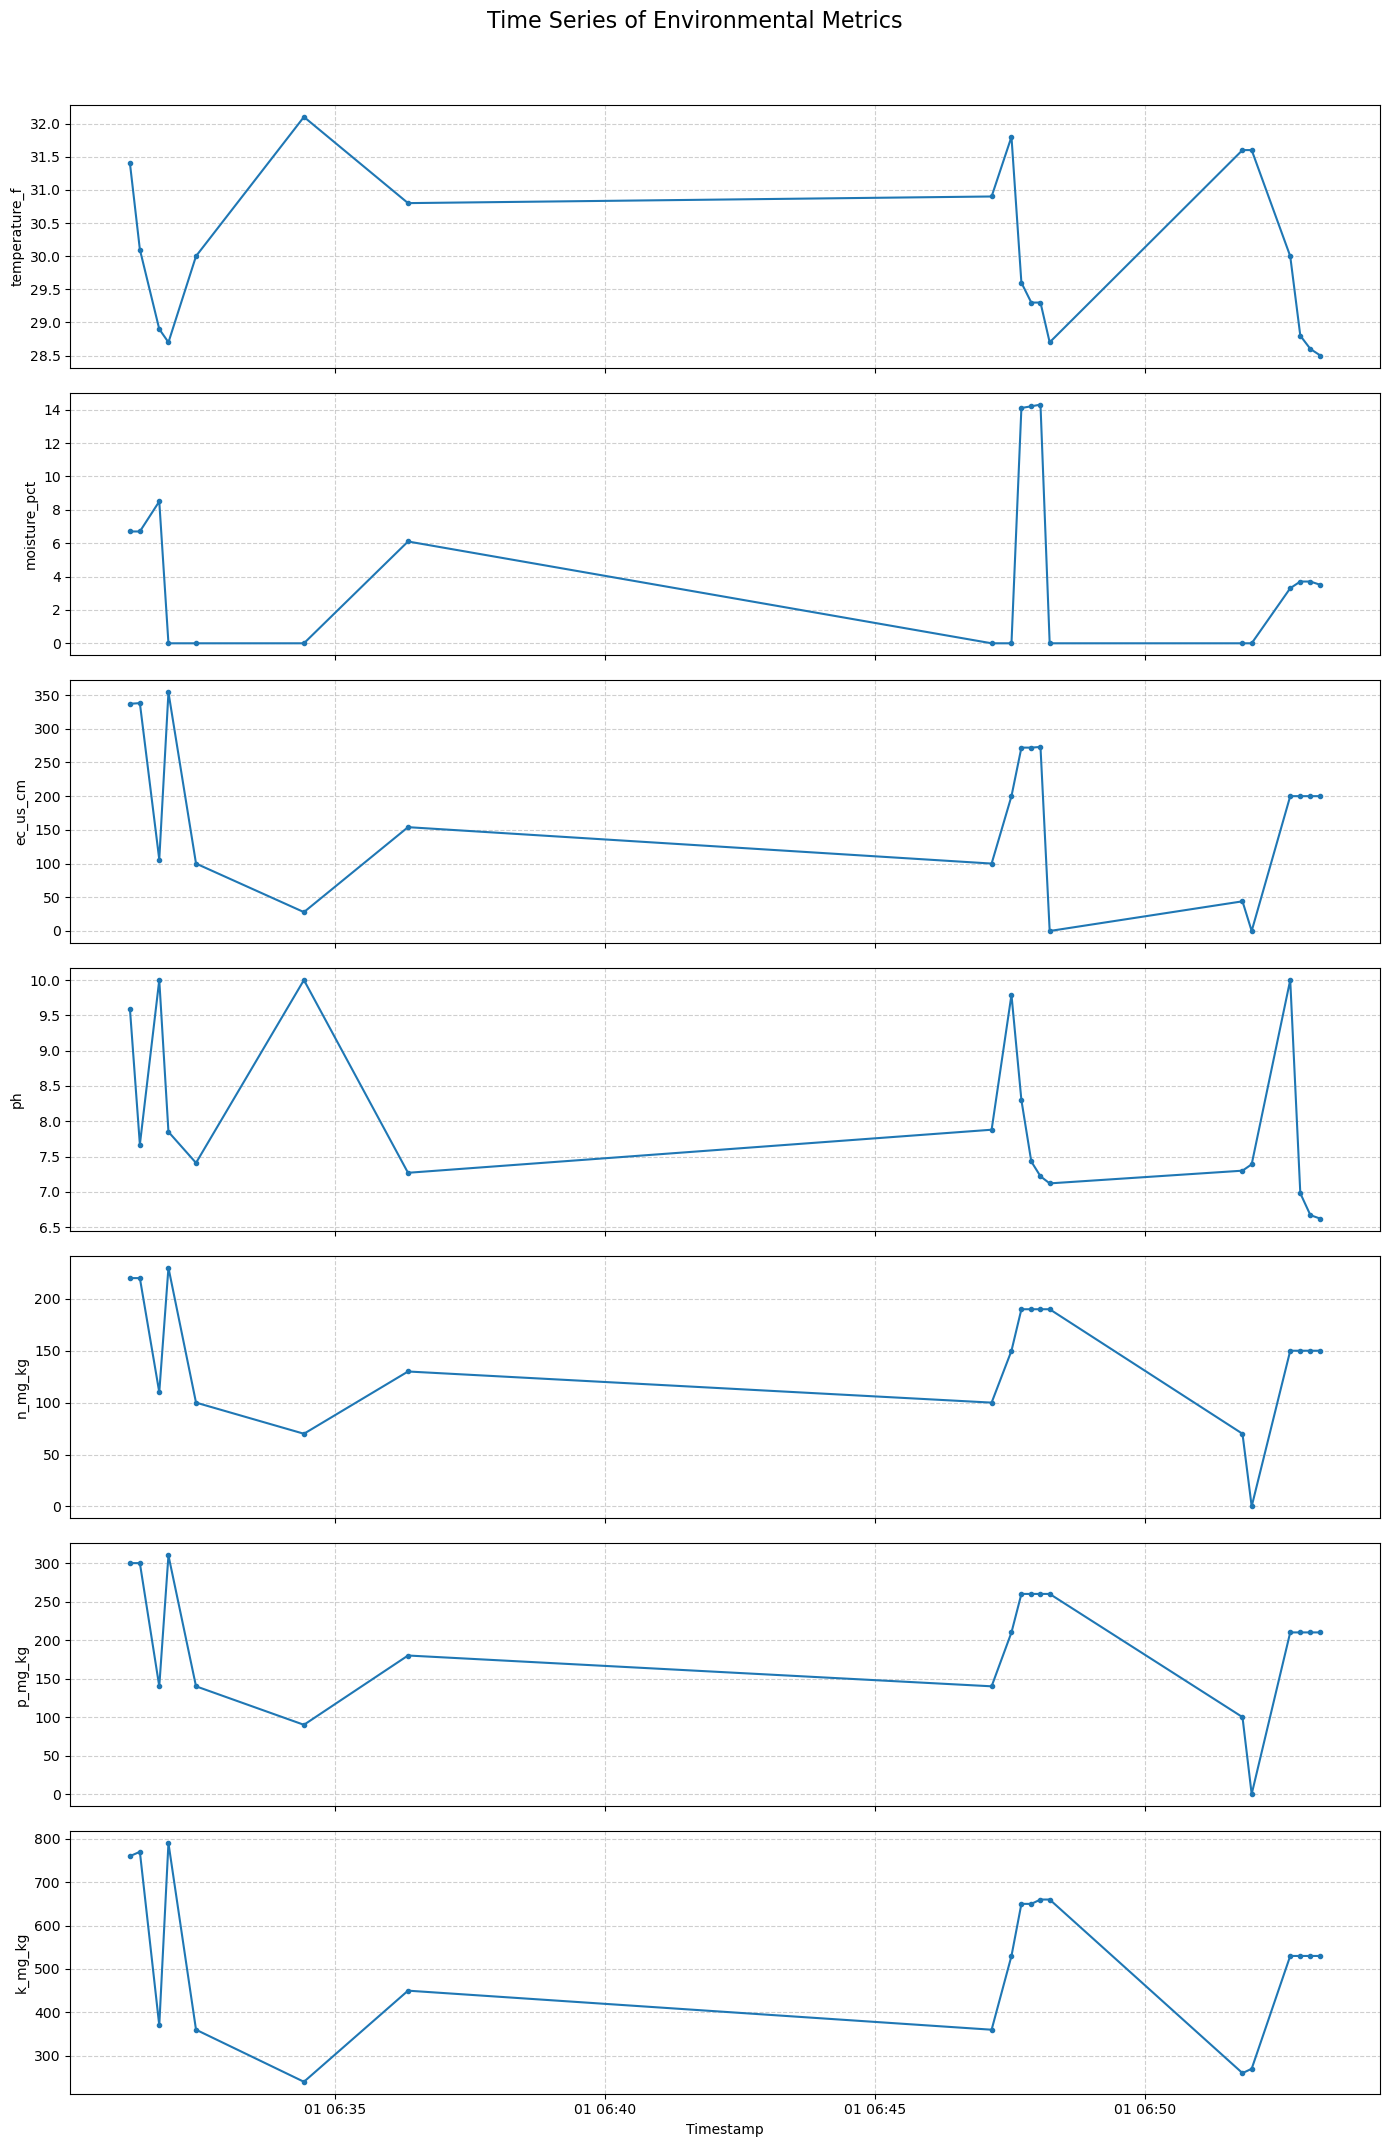

In [18]:
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 3*len(metrics)), sharex=True)
for i, col in enumerate(metrics):
    axes[i].plot(df["timestamp"].values, df[col].values, marker="o", markersize=3, linestyle="-")
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.6)
axes[-1].set_xlabel("Timestamp")
plt.suptitle("Time Series of Environmental Metrics", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

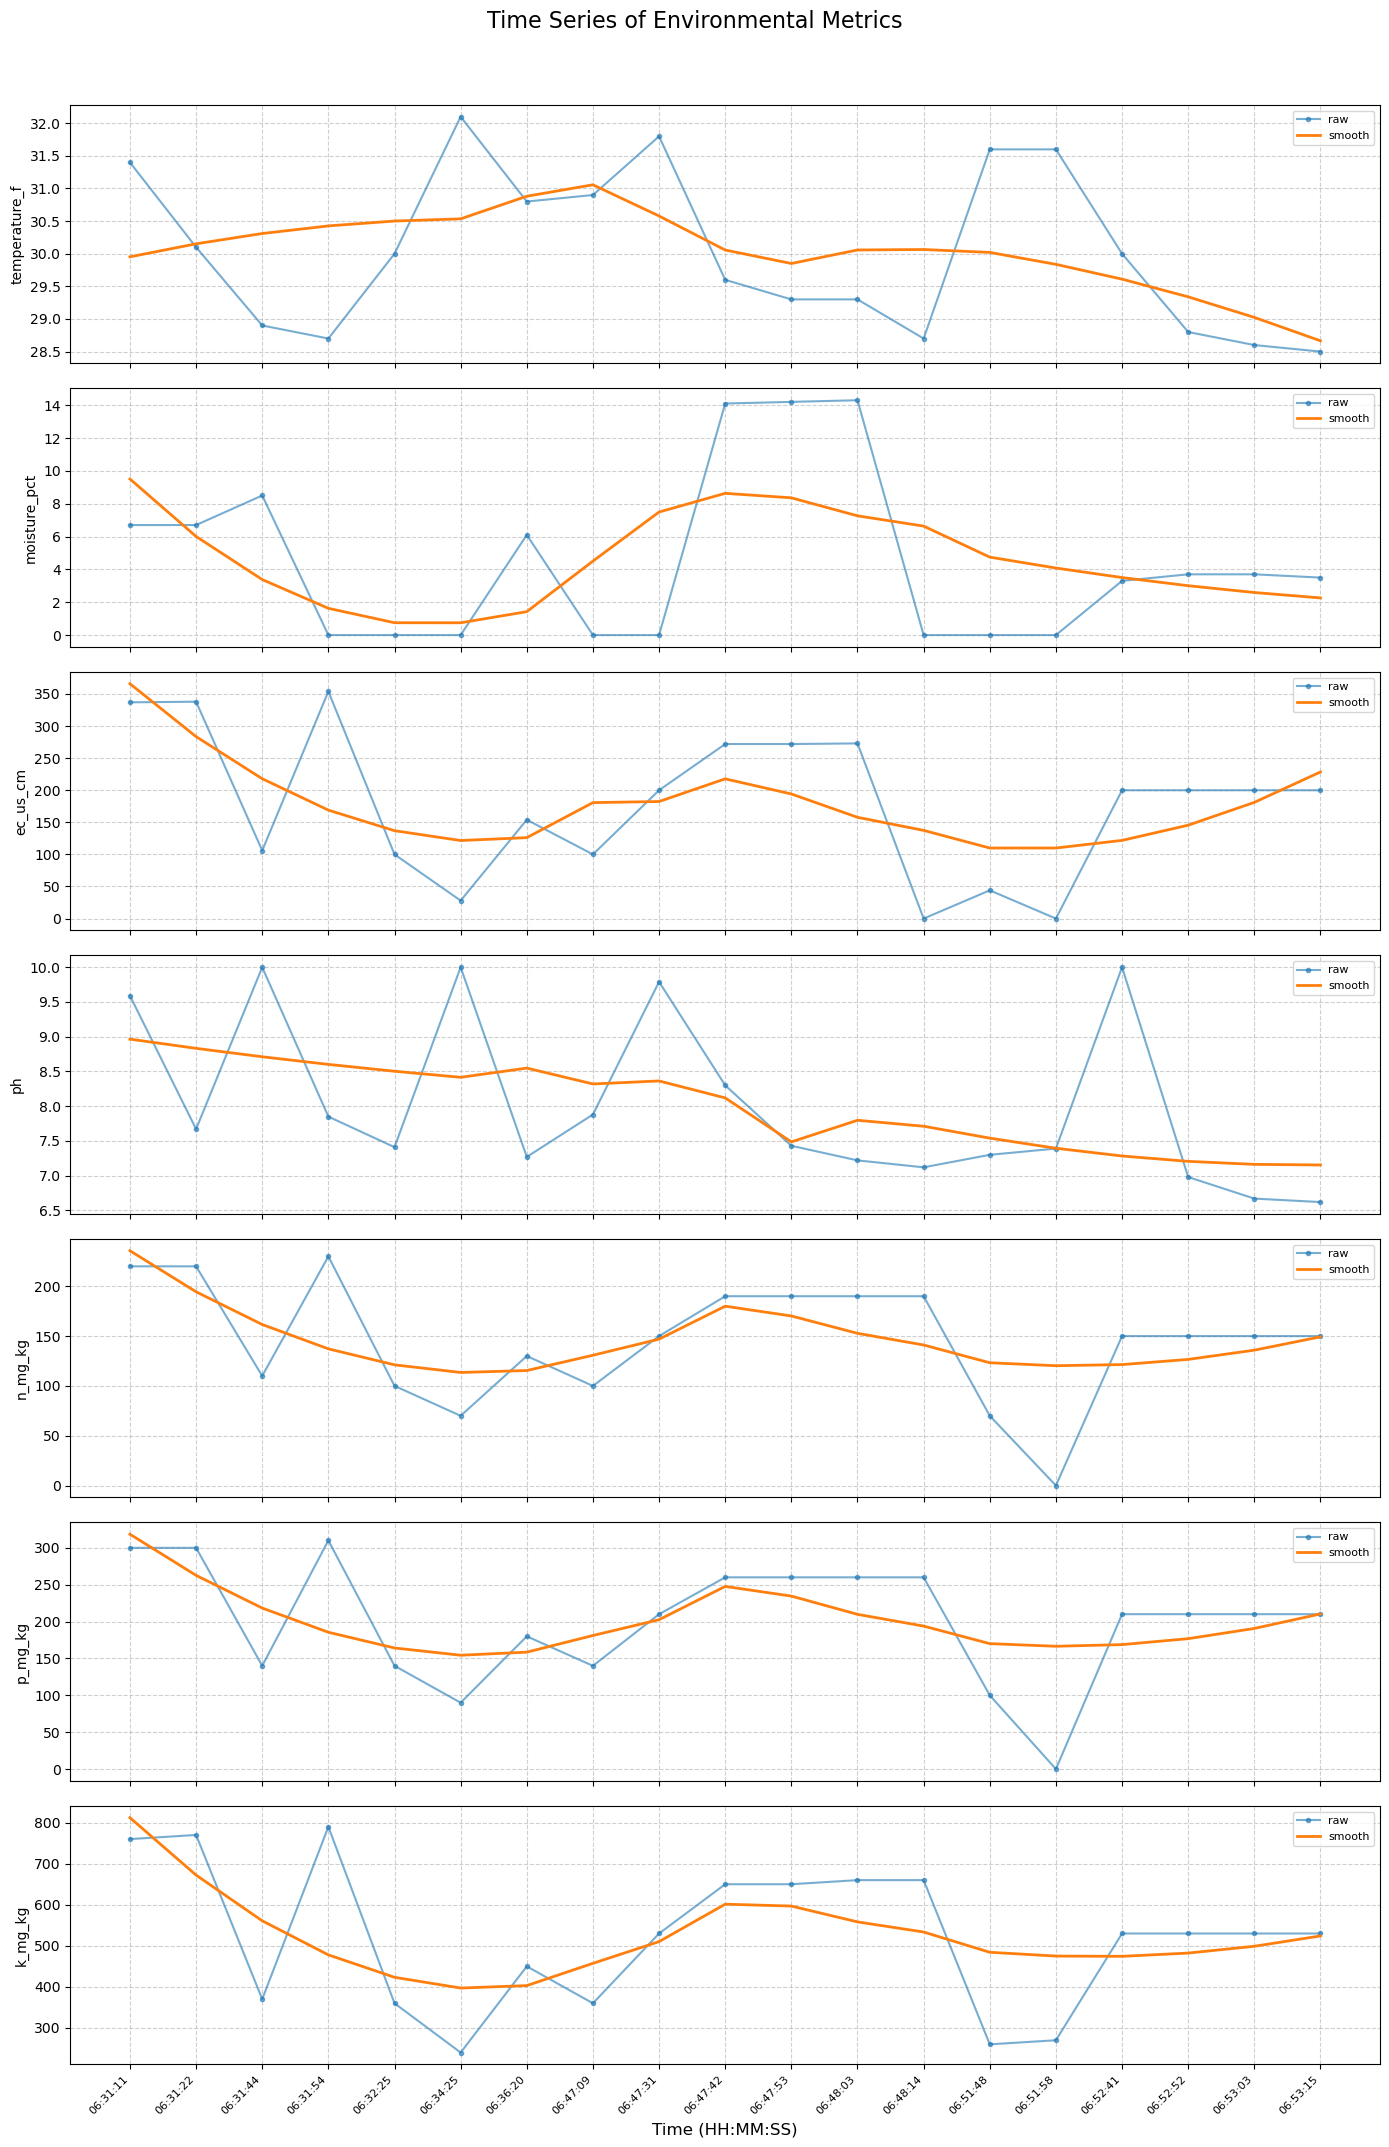

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Convert timestamp to HH:MM:SS if it's datetime
df["time_str"] = pd.to_datetime(df["timestamp"]).dt.strftime("%H:%M:%S")

fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 3*len(metrics)), sharex=True)

for i, col in enumerate(metrics):
    ax = axes[i]
    
    # X and Y values
    x = np.arange(len(df))  # numeric index for plotting
    y = df[col].values.astype(float)
    
    # Plot raw points
    ax.plot(x, y, marker="o", markersize=3, linestyle="-", alpha=0.6, label="raw")
    
    # Smoothed curve with Savitzky-Golay filter (fallback to rolling mean if not enough points)
    window = min(11, len(y) if len(y) % 2 == 1 else len(y)-1)  # odd window ≤ data length
    if window >= 5:  
        y_smooth = savgol_filter(y, window, polyorder=2)
    else:
        y_smooth = pd.Series(y).rolling(window=3, min_periods=1).mean().to_numpy()
    
    ax.plot(x, y_smooth, linewidth=2, label="smooth")
    
    # Axis formatting
    ax.set_ylabel(col, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend(fontsize=8)
    
    # Add time labels for each subplot
    step = max(1, len(x)//10)  # about 10 ticks
    ax.set_xticks(x[::step])
    ax.set_xticklabels(df["time_str"].iloc[::step], rotation=45, ha="right", fontsize=8)

# Shared X label
axes[-1].set_xlabel("Time (HH:MM:SS)", fontsize=12)

plt.suptitle("Time Series of Environmental Metrics", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


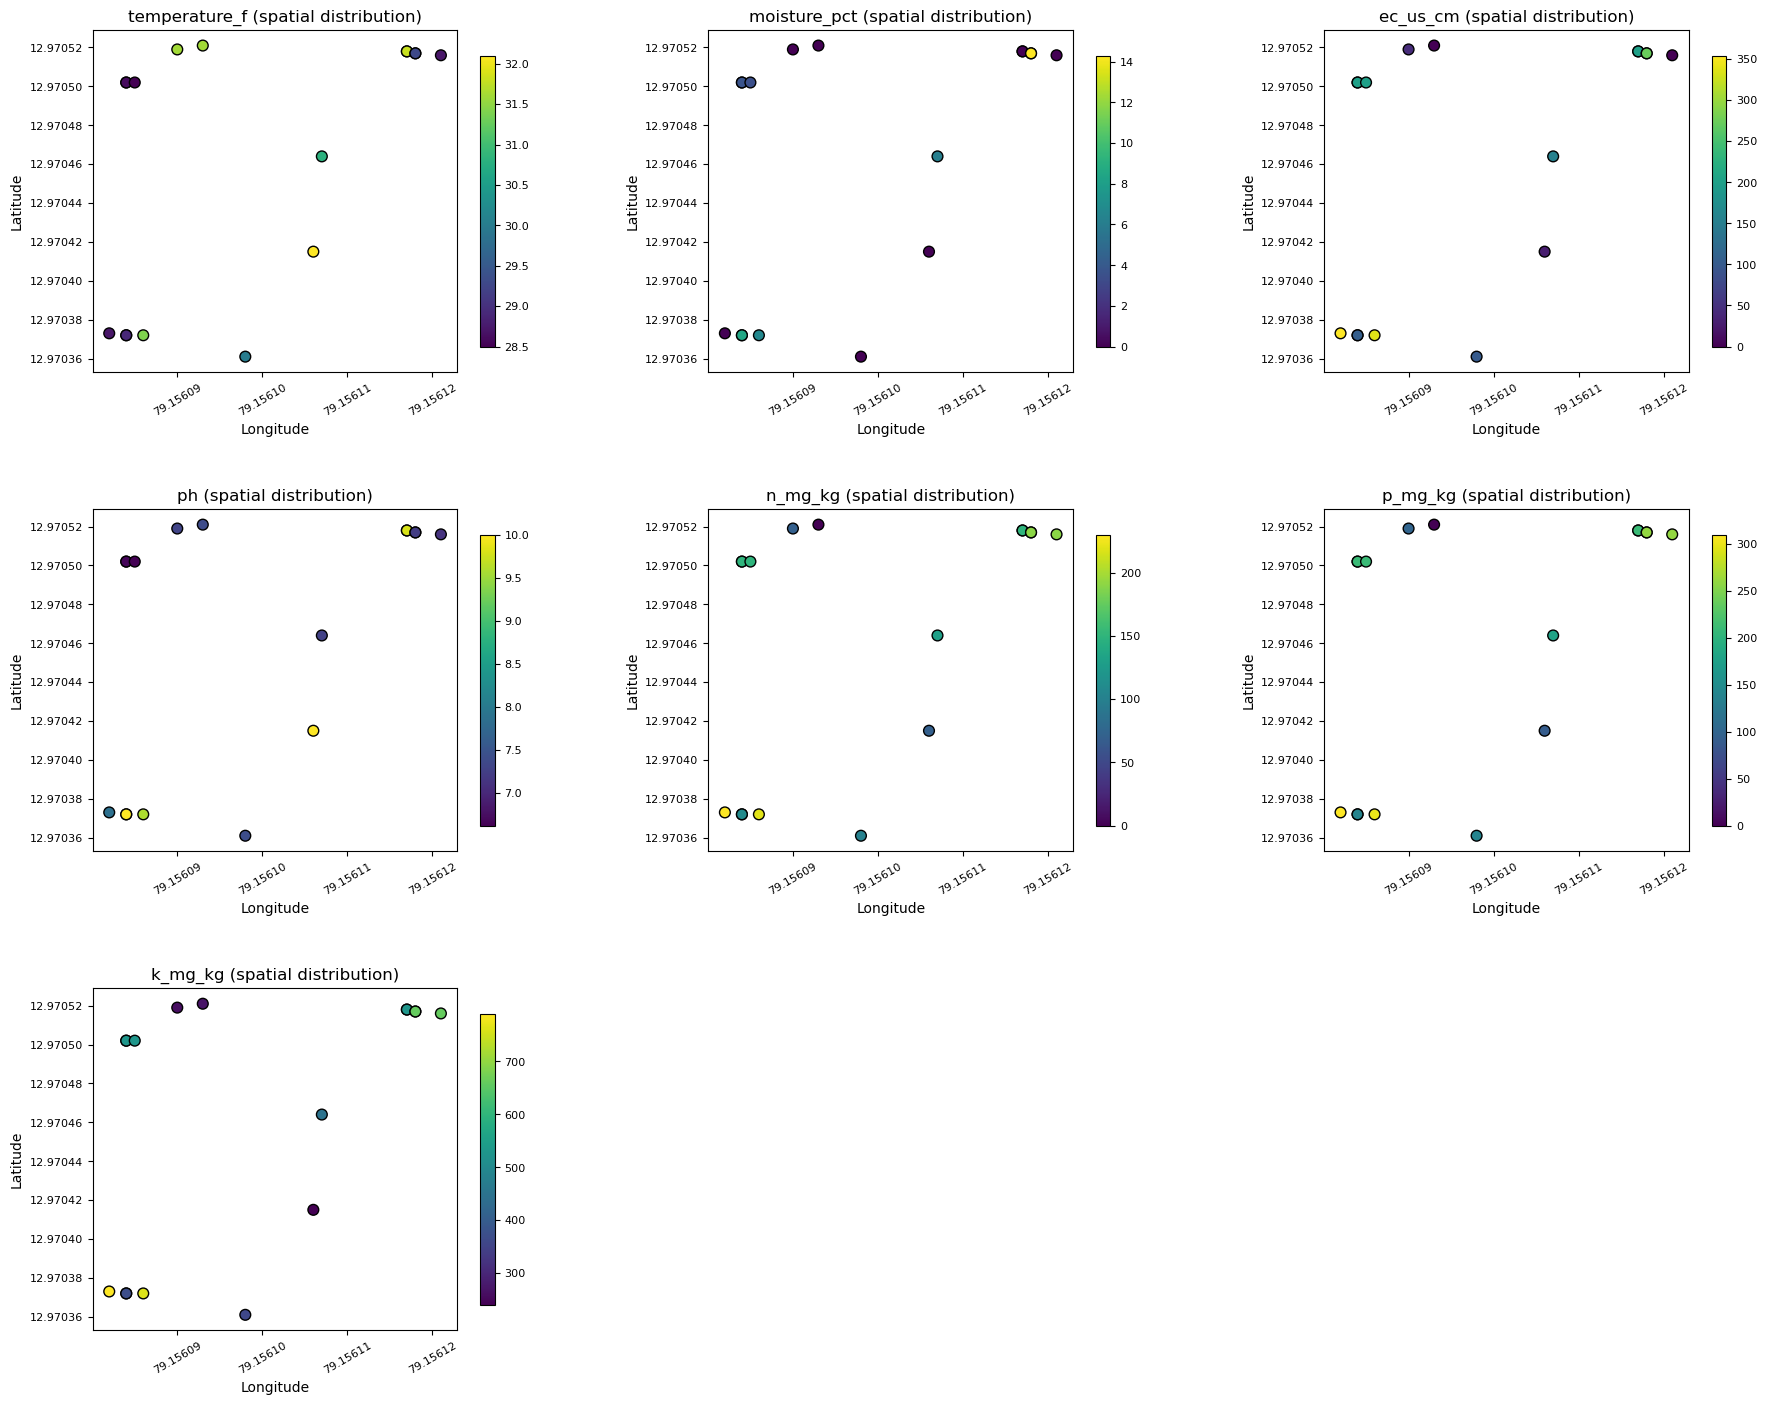

In [17]:
import math
import matplotlib.ticker as mticker

# ---------- FIXED SPATIAL SCATTER PLOTS (no scientific notation overlap) ----------
n_metrics = len(metrics)
n_cols = 3  # up to 3 plots per row
n_rows = math.ceil(n_metrics / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(metrics):
    sc = axes[i].scatter(
        df["longitude"].to_numpy().ravel(),
        df["latitude"].to_numpy().ravel(),
        c=df[col].to_numpy().ravel(),
        cmap="viridis", s=60, edgecolor="k"
    )
    axes[i].set_title(f"{col} (spatial distribution)", fontsize=12)
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")

    # Force plain formatting (no scientific notation)
    axes[i].xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
    axes[i].yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))

    # Rotate ticks for clarity
    for label in axes[i].get_xticklabels():
        label.set_rotation(30)
        label.set_fontsize(8)
    for label in axes[i].get_yticklabels():
        label.set_fontsize(8)

    cbar = plt.colorbar(sc, ax=axes[i], shrink=0.85)
    cbar.ax.tick_params(labelsize=8)

# Hide unused axes
for j in range(n_metrics, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.35)
plt.show()

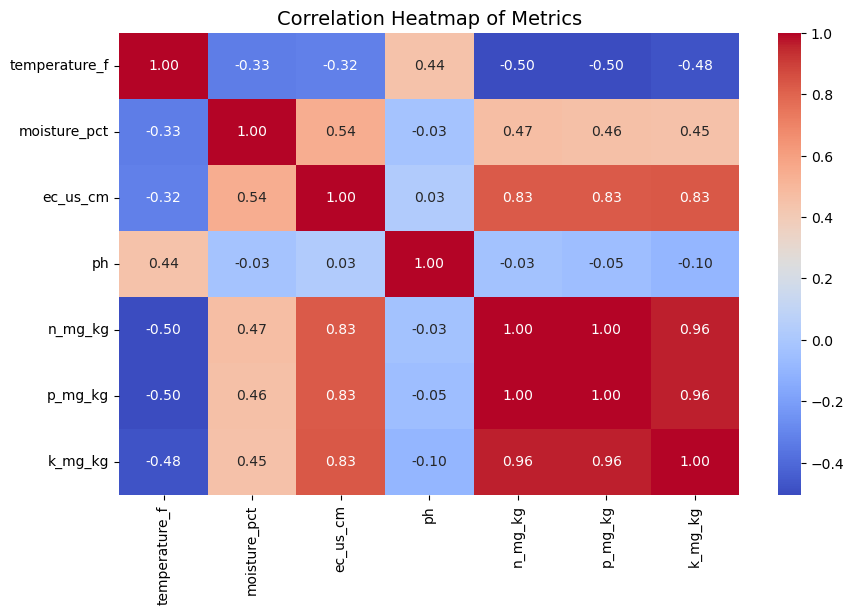

In [15]:
plt.figure(figsize=(10, 6))
corr = df[metrics].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Metrics", fontsize=14)
plt.show()